# DS5500

## 1.EDA 

In [1]:
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cufflinks as cf
cf.go_offline()

In [2]:
orgin_df = pd.read_csv('SampleOriginationCombined.csv', low_memory=False)
orgin_df

fico  dt_first_pi flag_fthb  dt_matr  cd_msa  mi_pct  cnt_units  \
0         618       200210         N   202902   10420      25          1   
1         619       200303         N   201802       0       0          1   
2         515       200303         N   202903   12700       0          1   
3         649       199904         Y   202903   17820     999          1   
4         768       199905         N   202904   12980       0          1   
...       ...          ...       ...      ...     ...     ...        ...   
1112495   654       202105         N   205104   47894       0          1   
1112496   802       202106         N   205105   47894       0          1   
1112497   785       202105         N   205104   41980       0          1   
1112498   801       202104         N   204503   15540       0          1   
1112499   789       202104         N   205103   16984       0          1   

        occpy_sts  cltv  dti  ...  cnt_borr    seller_name  \
0               P    85   24  ...         2  Other sellers   
1               P    74   25  ...         2  Other sellers   
2               S    78   32  ...         2  Other sellers   
3               P    95   46  ...         1  Other sellers   
4               P    75   21  ...         2  Other sellers   
...           ...   ...  ...  ...       ...            ...   
1112495         P    79   40  ...         2  Other sellers   
1112496         I    50   40  ...         1  Other sellers   
1112497         I    68   26  ...         2  Other sellers   
1112498         I    50   42  ...         2  Other sellers   
1112499         P    78   21  ...         1  Other sellers   

                     servicer_name flag_sc id_preharp indicator  \
0                  Other servicers       N        NaN         9   
1                  Other servicers       N        NaN         9   
2                  Other servicers       N        NaN         9   
3        GMAC MORTGAGE CORPORATION       N        NaN         9   
4                  Other servicers       N        NaN         9   
...                            ...     ...        ...       ...   
1112495            Other servicers       N        NaN         9   
1112496            Other servicers       N        NaN         9   
1112497            Other servicers       N        NaN         9   
1112498            Other servicers       N        NaN         9   
1112499            Other servicers       N        NaN         9   

        harp_indicator property_method  interest_only  Year  
0                    N               9              N  1999  
1                    N               9              N  1999  
2                    N               9              N  1999  
3                    N               9              N  1999  
4                    N               9              N  1999  
...                ...             ...            ...   ...  
1112495              N               2              N  2021  
1112496              N               2              N  2021  
1112497              N               2              N  2021  
1112498              N               2              N  2021  
1112499              N               2              N  2021  

[1112500 rows x 32 columns]

In [3]:
orgin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112500 entries, 0 to 1112499
Data columns (total 32 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   fico             1112500 non-null  int64  
 1   dt_first_pi      1112500 non-null  int64  
 2   flag_fthb        1112500 non-null  object 
 3   dt_matr          1112500 non-null  int64  
 4   cd_msa           1112500 non-null  int64  
 5   mi_pct           1112500 non-null  int64  
 6   cnt_units        1112500 non-null  int64  
 7   occpy_sts        1112500 non-null  object 
 8   cltv             1112500 non-null  int64  
 9   dti              1112500 non-null  int64  
 10  orig_upb         1112500 non-null  int64  
 11  ltv              1112500 non-null  int64  
 12  int_rt           1112500 non-null  float64
 13  channel          1112500 non-null  object 
 14  ppmt_pnlty       1112500 non-null  object 
 15  prod_type        1112500 non-null  object 
 16  st               1

In [4]:
performance_df=pd.read_csv('SamplePerformanceCombinedSummary.csv', low_memory=False)
performance_df

id_loan  min_current_upb  max_current_upb  min_delq_sts  \
0        F99Q10000029              0.0        121930.35             0   
1        F99Q10000064              0.0        107315.78             0   
2        F99Q10000070              0.0        231509.90             0   
3        F99Q10000170              0.0        156000.00             0   
4        F99Q10000228              0.0        111000.00             0   
...               ...              ...              ...           ...   
1109133  F21Q12493864         428000.0        428000.00             0   
1109134  F21Q12493920         112000.0        112000.00             0   
1109135  F21Q12494047         149000.0        149000.00             0   
1109136  F21Q12494268         148000.0        148000.00             0   
1109137  F21Q12494296         305000.0        305000.00             0   

         max_delq_sts  min_cd_zero_bal  max_cd_zero_bal  \
0                   0                0                1   
1                   0                0                1   
2                   0                0                1   
3                 999                0                9   
4                   0                0                1   
...               ...              ...              ...   
1109133             0                0                0   
1109134             0                0                0   
1109135             0                0                0   
1109136             0                0                0   
1109137             0                0                0   

         min_non_mi_recoveries  max_non_mi_recoveries  min_expenses  ...  \
0                          0.0                    0.0           0.0  ...   
1                          0.0                    0.0           0.0  ...   
2                          0.0                    0.0           0.0  ...   
3                          0.0               163991.0        -690.0  ...   
4                          0.0                    0.0           0.0  ...   
...                        ...                    ...           ...  ...   
1109133                    0.0                    0.0           0.0  ...   
1109134                    0.0                    0.0           0.0  ...   
1109135                    0.0                    0.0           0.0  ...   
1109136                    0.0                    0.0           0.0  ...   
1109137                    0.0                    0.0           0.0  ...   

         min_maint_pres_costs  max_maint_pres_costs  min_taxes_ins_costs  \
0                         0.0                   0.0                  0.0   
1                         0.0                   0.0                  0.0   
2                         0.0                   0.0                  0.0   
3                         0.0                   0.0                  0.0   
4                         0.0                   0.0                  0.0   
...                       ...                   ...                  ...   
1109133                   0.0                   0.0                  0.0   
1109134                   0.0                   0.0                  0.0   
1109135                   0.0                   0.0                  0.0   
1109136                   0.0                   0.0                  0.0   
1109137                   0.0                   0.0                  0.0   

         max_taxes_ins_costs  min_misc_costs  max_misc_costs  min_actual_loss  \
0                        0.0             0.0             0.0                0   
1                        0.0             0.0             0.0                0   
2                        0.0             0.0             0.0                0   
3                        0.0          -690.0             0.0                0   
4                        0.0             0.0             0.0                0   
...                      ...             ...             ...              ...   
1109133                  0.0       

In [5]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109138 entries, 0 to 1109137
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id_loan                1109138 non-null  object 
 1   min_current_upb        1109138 non-null  float64
 2   max_current_upb        1109138 non-null  float64
 3   min_delq_sts           1109138 non-null  int64  
 4   max_delq_sts           1109138 non-null  int64  
 5   min_cd_zero_bal        1109138 non-null  int64  
 6   max_cd_zero_bal        1109138 non-null  int64  
 7   min_non_mi_recoveries  1109138 non-null  float64
 8   max_non_mi_recoveries  1109138 non-null  float64
 9   min_expenses           1109138 non-null  float64
 10  max_expenses           1109138 non-null  float64
 11  min_legal_costs        1109138 non-null  float64
 12  max_legal_costs        1109138 non-null  float64
 13  min_maint_pres_costs   1109138 non-null  float64
 14  max_maint_pres_cos

## Merge Two Dataframes

In [6]:
joined_df = pd.DataFrame()
joined_df = pd.merge(orgin_df, performance_df, on='id_loan', how='inner')
joined_df

fico  dt_first_pi flag_fthb  dt_matr  cd_msa  mi_pct  cnt_units  \
0         618       200210         N   202902   10420      25          1   
1         619       200303         N   201802       0       0          1   
2         515       200303         N   202903   12700       0          1   
3         649       199904         Y   202903   17820     999          1   
4         768       199905         N   202904   12980       0          1   
...       ...          ...       ...      ...     ...     ...        ...   
1109133   654       202105         N   205104   47894       0          1   
1109134   802       202106         N   205105   47894       0          1   
1109135   785       202105         N   205104   41980       0          1   
1109136   801       202104         N   204503   15540       0          1   
1109137   789       202104         N   205103   16984       0          1   

        occpy_sts  cltv  dti  ...  min_maint_pres_costs  max_maint_pres_costs  \
0               P    85   24  ...                   0.0                   0.0   
1               P    74   25  ...                   0.0                   0.0   
2               S    78   32  ...                   0.0                   0.0   
3               P    95   46  ...                   0.0                   0.0   
4               P    75   21  ...                   0.0                   0.0   
...           ...   ...  ...  ...                   ...                   ...   
1109133         P    79   40  ...                   0.0                   0.0   
1109134         I    50   40  ...                   0.0                   0.0   
1109135         I    68   26  ...                   0.0                   0.0   
1109136         I    50   42  ...                   0.0                   0.0   
1109137         P    78   21  ...                   0.0                   0.0   

         min_taxes_ins_costs max_taxes_ins_costs min_misc_costs  \
0                        0.0                 0.0            0.0   
1                        0.0                 0.0            0.0   
2                        0.0                 0.0            0.0   
3                        0.0                 0.0         -690.0   
4                        0.0                 0.0            0.0   
...                      ...                 ...            ...   
1109133                  0.0                 0.0            0.0   
1109134                  0.0                 0.0            0.0   
1109135                  0.0                 0.0            0.0   
1109136                  0.0                 0.0            0.0   
1109137                  0.0                 0.0            0.0   

        max_misc_costs min_actual_loss max_actual_loss  min_modcost  \
0                  0.0               0               0          0.0   
1                  0.0               0               0          0.0   
2                  0.0               0               0          0.0   
3                  0.0               0               0          0.0   
4                  0.0               0               0          0.0   
...                ...             ...             ...          ...   
1109133            0.0               0               0          0.0   
1109134            0.0               0               0          0.0   
1109135            0.0               0               0          0.0   
1109136            0.0               0               0          0.0   
1109137            0.0               0               0          0.0   

        max_modcost  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
1109133         0.0  
1109134         0.0  
1109135         0.0  
1109136         0.0  
1109137         0.0  

[1109138 rows x 54 columns]

In [7]:
joined_df.describe()

fico   dt_first_pi       dt_matr        cd_msa        mi_pct  \
count  1.109138e+06  1.109138e+06  1.109138e+06  1.109138e+06  1.109138e+06   
mean   7.579772e+02  2.009849e+05  2.035772e+05  2.325042e+04  4.531185e+00   
std    4.083915e+02  6.429386e+02  9.545980e+02  1.622310e+04  1.114265e+01   
min    3.000000e+02  1.999010e+05  2.003120e+05  0.000000e+00  0.000000e+00   
25%    7.060000e+02  2.004090e+05  2.030060e+05  1.126000e+04  0.000000e+00   
50%    7.510000e+02  2.010040e+05  2.036100e+05  2.458000e+04  0.000000e+00   
75%    7.830000e+02  2.015110e+05  2.044030e+05  3.806000e+04  0.000000e+00   
max    9.999000e+03  2.021080e+05  2.051070e+05  4.974000e+04  9.990000e+02   

          cnt_units          cltv           dti      orig_upb           ltv  \
count  1.109138e+06  1.109138e+06  1.109138e+06  1.109138e+06  1.109138e+06   
mean   1.029745e+00  7.279268e+01  1.163561e+02  1.945605e+05  7.154077e+01   
std    3.905221e-01  2.058357e+01  2.704401e+02  1.137750e+05  1.989929e+01   
min    1.000000e+00  3.000000e+00  1.000000e+00  8.000000e+03  3.000000e+00   
25%    1.000000e+00  6.200000e+01  2.600000e+01  1.090000e+05  6.100000e+01   
50%    1.000000e+00  7.600000e+01  3.500000e+01  1.680000e+05  7.500000e+01   
75%    1.000000e+00  8.300000e+01  4.400000e+01  2.550000e+05  8.000000e+01   
max    9.900000e+01  9.990000e+02  9.990000e+02  1.360000e+06  9.990000e+02   

       ...  min_maint_pres_costs  max_maint_pres_costs  min_taxes_ins_costs  \
count  ...          1.109138e+06          1.109138e+06         1.109138e+06   
mean   ...         -8.932236e+01          8.512521e-03        -1.208126e+02   
std    ...          1.218086e+03          6.434616e+00         1.587923e+03   
min    ...         -8.076447e+04          0.000000e+00        -1.680263e+05   
25%    ...          0.000000e+00          0.000000e+00         0.000000e+00   
50%    ...          0.000000e+00          0.000000e+00         0.000000e+00   
75%    ...          0.000000e+00          0.000000e+00         0.000000e+00   
max    ...          0.000000e+00          6.227190e+03         0.000000e+00   

       max_taxes_ins_costs  min_misc_costs  max_misc_costs  min_actual_loss  \
count         1.109138e+06    1.109138e+06    1.109138e+06     1.109138e+06   
mean          2.943876e+00   -1.757205e+01    6.243285e-01    -1.272935e+03   
std           5.111698e+02    3.001730e+02    6.422149e+01     1.245655e+04   
min           0.000000e+00   -7.980954e+04    0.000000e+00    -5.571480e+05   
25%           0.000000e+00    0.000000e+00    0.000000e+00     0.000000e+00   
50%           0.000000e+00    0.000000e+00    0.000000e+00     0.000000e+00   
75%           0.000000e+00    0.000000e+00    0.000000e+00     0.000000e+00   
max           3.222966e+05    0.000000e+00    2.502047e+04     0.000000e+00   

       max_actual_loss   min_modcost   max_modcost  
count     1.109138e+06  1.109138e+06  1.109138e+06  
mean      2.154997e+01 -1.545890e+00  2.915600e+02  
std       6.433778e+02  8.298099e+01  4.193238e+03  
min       0.000000e+00 -2.696045e+04  0.000000e+00  
25%       0.000000e+00  0.000000e+00  0.000000e+00  
50%       0.000000e+00  0.000000e+00  0.000000e+00  
75%       0.000000e+00  0.000000e+00  0.000000e+00  
max       2.090180e+05  0.000000e+00  3.146400e+05  

[8 rows x 38 columns]

In [8]:
joined_df.corr()

fico  dt_first_pi   dt_matr    cd_msa    mi_pct  \
fico                   1.000000    -0.023499 -0.022484 -0.007660 -0.003927   
dt_first_pi           -0.023499     1.000000  0.732172  0.225065  0.081008   
dt_matr               -0.022484     0.732172  1.000000  0.345803  0.180887   
cd_msa                -0.007660     0.225065  0.345803  1.000000  0.026719   
mi_pct                -0.003927     0.081008  0.180887  0.026719  1.000000   
cnt_units              0.001322    -0.002917  0.002017 -0.008441 -0.019380   
cltv                  -0.020684     0.073966  0.231176  0.027539  0.401706   
dti                   -0.012745     0.063555  0.002334 -0.056178 -0.054844   
orig_upb              -0.006555     0.373401  0.396449  0.235620  0.030306   
ltv                   -0.018437     0.082249  0.240068  0.027954  0.439414   
int_rt                 0.020246    -0.833977 -0.442251 -0.135563  0.025893   
zipcode                0.003956     0.049934  0.067855  0.092207 -0.023567   
orig_loan_term        -0.009640     0.086770  0.741626  0.284326  0.184950   
cnt_borr              -0.004847    -0.051285 -0.053530 -0.019539 -0.018798   
property_method        0.005709    -0.682819 -0.520246 -0.123610 -0.101058   
Year                  -0.023969     0.998441  0.731872  0.225158  0.081071   
min_current_upb       -0.005633     0.488273  0.382726  0.117273  0.048541   
max_current_upb       -0.006886     0.372774  0.397165  0.235727  0.031256   
min_delq_sts          -0.000349    -0.000321 -0.000376 -0.000540  0.000061   
max_delq_sts          -0.009812    -0.063856 -0.010561 -0.005902  0.061519   
min_cd_zero_bal        0.000349    -0.003392 -0.002108 -0.000716 -0.001161   
max_cd_zero_bal       -0.001127    -0.072417 -0.027770 -0.007712  0.026831   
min_non_mi_recoveries  0.000377     0.001087 -0.000236  0.000119 -0.005232   
max_non_mi_recoveries -0.001623    -0.017620 -0.000311  0.002343  0.032000   
min_expenses           0.011500     0.050370  0.002454 -0.005632 -0.033640   
max_expenses          -0.000376    -0.002560 -0.000581  0.000725  0.001202   
min_legal_costs        0.012550     0.055174  0.005713 -0.002611 -0.035435   
max_legal_costs       -0.000364    -0.002592 -0.001549  0.000186  0.003053   
min_maint_pres_costs   0.008140     0.038718  0.002471 -0.001575 -0.029285   
max_maint_pres_costs  -0.000498    -0.000275  0.000378 -0.000706 -0.000531   
min_taxes_ins_costs    0.009232     0.039014  0.000385 -0.007880 -0.024276   
max_taxes_ins_costs   -0.000121    -0.003342 -0.000717  0.000519  0.002032   
min_misc_costs         0.006997     0.028014  0.000875 -0.002842 -0.017858   
max_misc_costs        -0.001740    -0.004196  0.000051  0.000647  0.003460   
min_actual_loss        0.012522     0.050186 -0.002763 -0.015388 -0.008844   
max_actual_loss       -0.003890    -0.012927  0.000358  0.006115  0.007751   
min_modcost            0.003626     0.010564  0.004076 -0.001633 -0.004044   
max_modcost           -0.012012    -0.033350  0.003010  0.023638  0.013235   

                       cnt_units      cltv       dti  orig_upb       ltv  ...  \
fico                    0.001322 -0.020684 -0.012745 -0.006555 -0.018437  ...   
dt_first_pi            -0.002917  0.073966  0.063555  0.373401  0.082249  ...   
dt_matr                 0.002017  0.231176  0.002334  0.396449  0.240068  ...   
cd_msa                 -0.008441  0.027539 -0.056178  0.235620  0.027954  ...   
mi_pct                 -0.019380  0.401706 -0.054844  0.030306  0.439414  ...   
cnt_units               1.000000  0.002833  0.003470  0.028211  0.005727  ...   
cltv                    0.002833  1.000000  0.150050  0.116937  0.962930  ...   
dti                     0.003470  0.150050  1.000000 -0.051767  0.100601  ...   
orig_upb                0.028211  0.116937 -0.051767  1.000000  0.110503  ...   
ltv                     0.005727  0.962930  0.100601  0.110503  1.000000  ...   
int_rt                  0.020597  0.027595 -0.110284 -0.334365  0.028614  ...   
zipcode     

<AxesSubplot:>

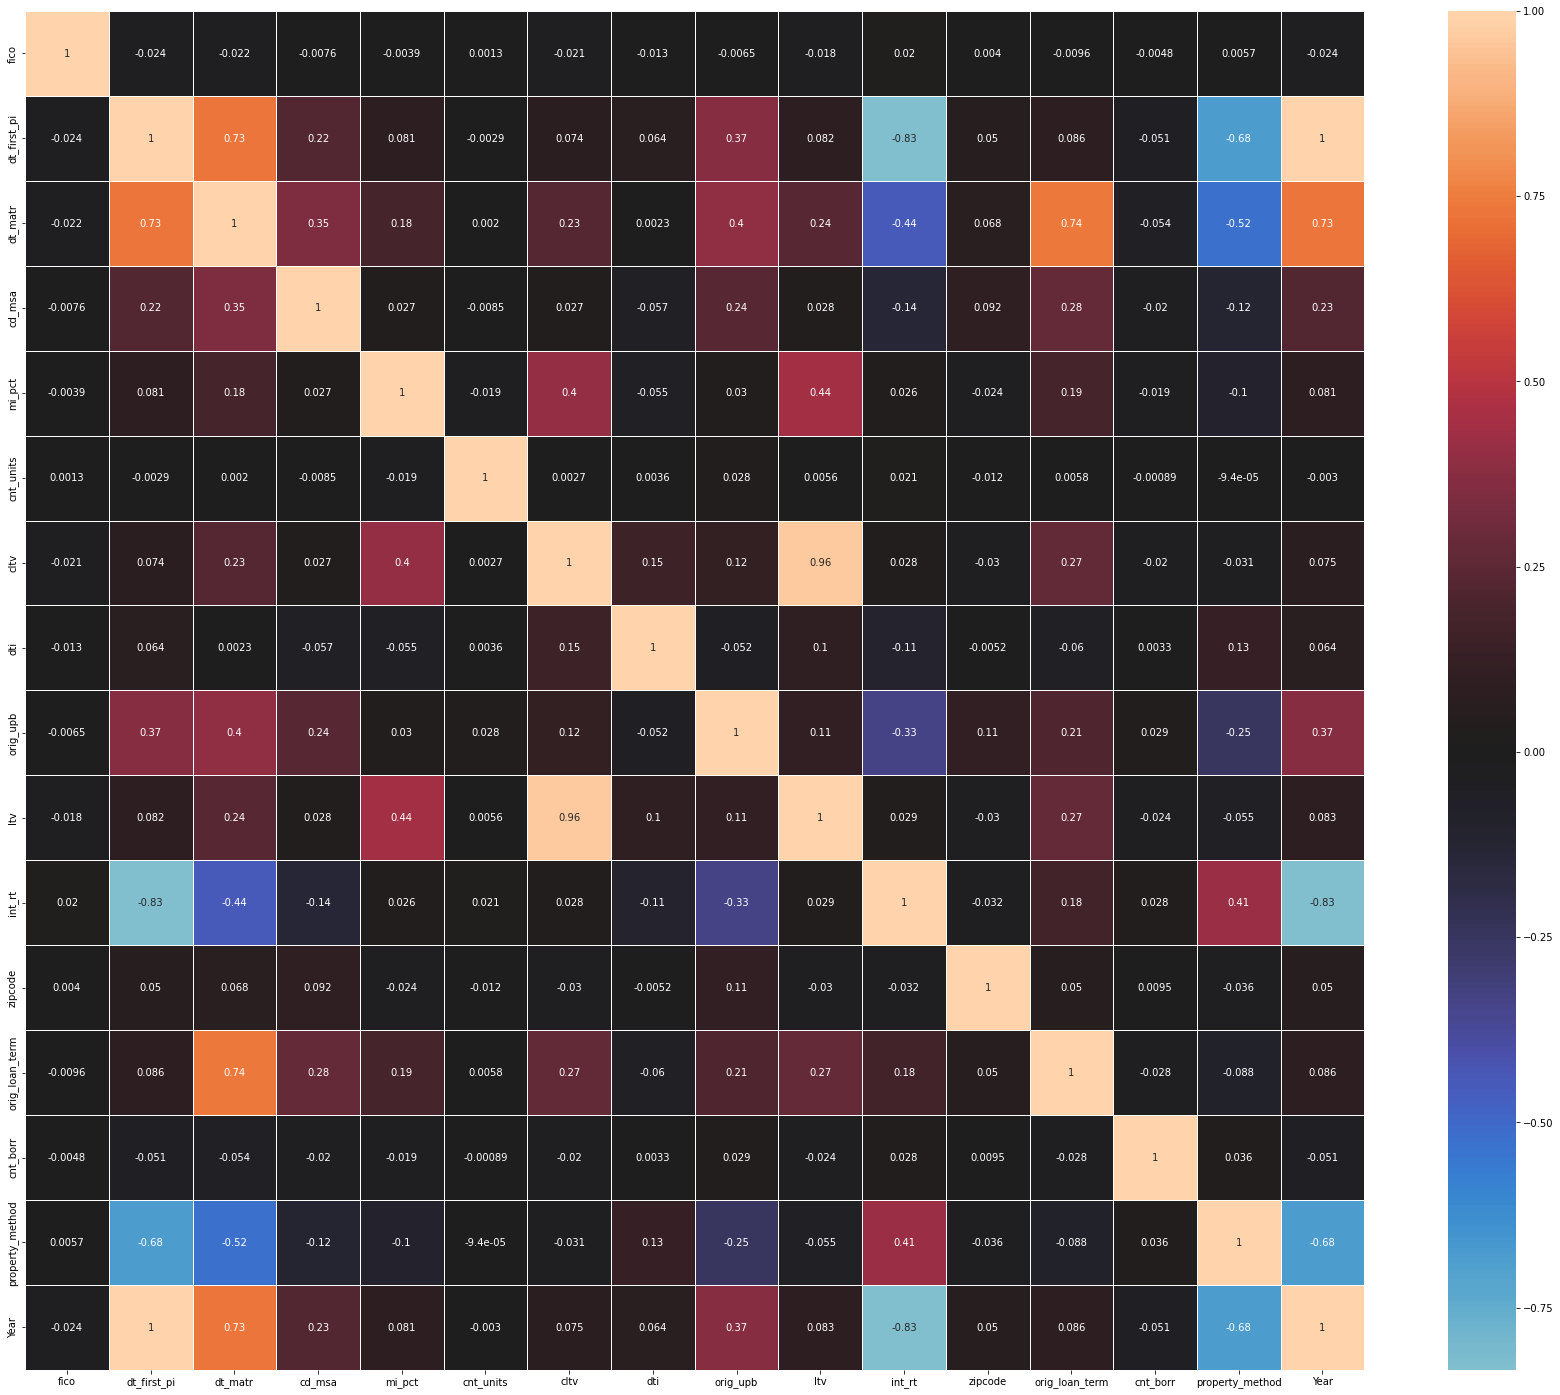

In [9]:
plt.figure(figsize=(30, 25))
sns.heatmap(orgin_df.corr(), annot=True, linewidths=0.5, center=0)

<AxesSubplot:>

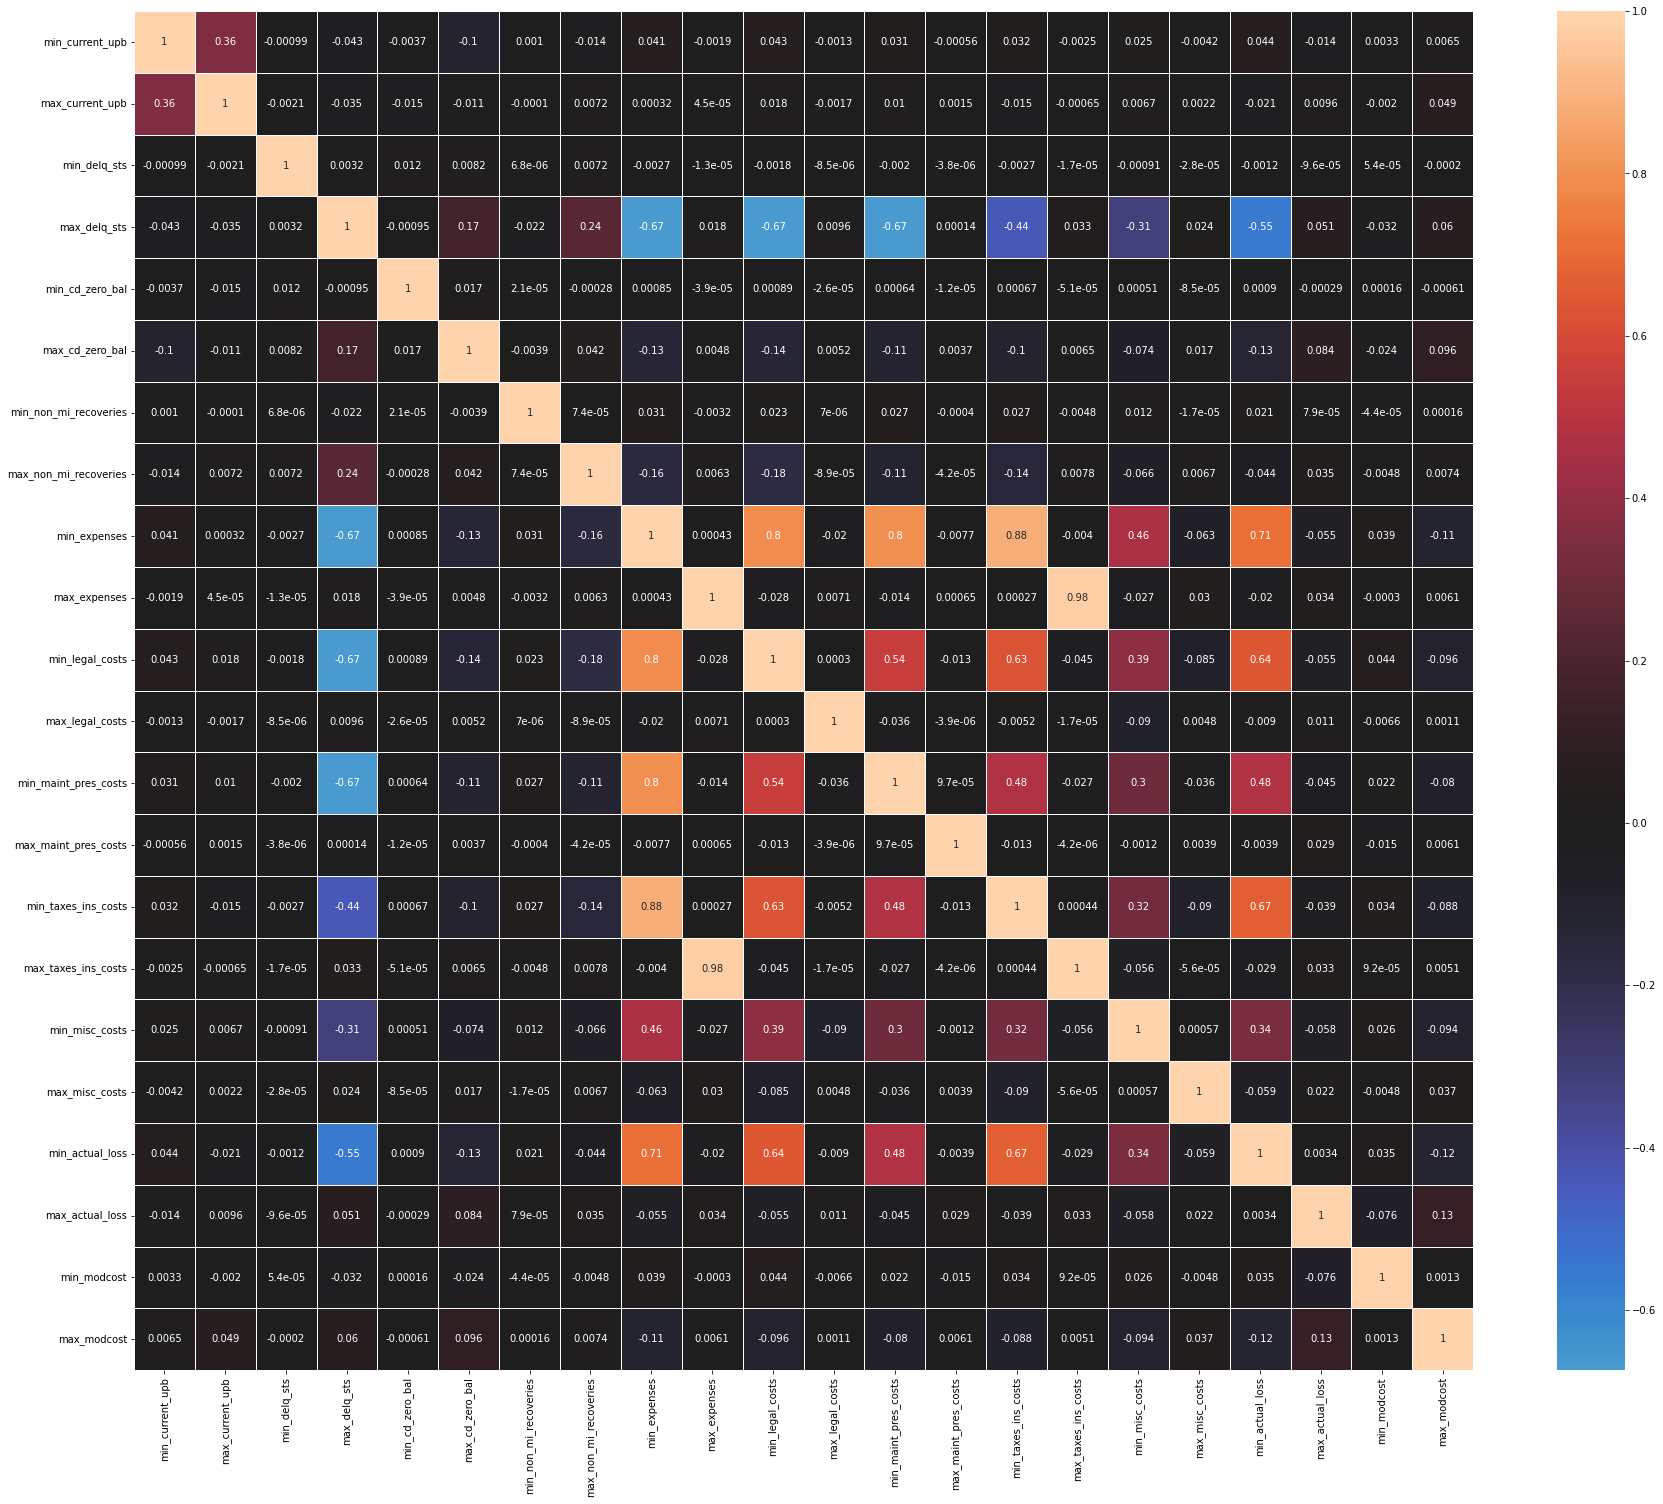

In [10]:
plt.figure(figsize=(30, 25))
sns.heatmap(performance_df.corr(), annot=True, linewidths=0.5, center=0)

In [11]:
data_grouped_year = joined_df.groupby('Year')
summarized_orgin_df = pd.DataFrame()
summarized_orgin_df = summarized_orgin_df.append(data_grouped_year.aggregate(np.mean))
summarized_orgin_df['loancount']=orgin_df['fico'].groupby(orgin_df['Year']).count()
summarized_orgin_df['year'] = summarized_orgin_df.index
summarized_orgin_df

fico    dt_first_pi        dt_matr        cd_msa    mi_pct  \
Year                                                                     
1999  783.109051  199925.659686  202445.703990  17476.026003  5.816042   
2000  857.768520  200026.556840  202719.329920  20149.183480  5.728020   
2001  771.043301  200125.048821  202581.112842  16461.343747  4.022560   
2002  797.770531  200222.585543  202556.019281  14404.436657  3.222709   
2003  737.091846  200321.729984  202557.562774  13633.205272  2.567894   
2004  731.835207  200424.605248  202906.556084  17578.925434  3.187395   
2005  731.196436  200522.949756  203189.167573  25573.687495  2.938095   
2006  733.411188  200623.697534  203406.234965  25020.452729  3.259785   
2007  733.261150  200723.857834  203539.791752  23242.257570  4.969359   
2008  749.917133  200823.177494  203602.125850  24122.638851  4.227638   
2009  761.150200  200923.599700  203589.280000  24673.444160  1.538060   
2010  760.493210  201023.185284  203515.379788  24235.565791  1.659373   
2011  760.180380  201123.329480  203525.005740  24635.791840  2.244680   
2012  759.512040  201222.826540  203652.127420  24662.648400  3.053020   
2013  749.979236  201318.571741  203822.238365  24967.646953  4.372311   
2014  747.268880  201423.421540  204050.303860  26372.514000  6.397300   
2015  750.023840  201522.958820  204143.943800  26900.112280  5.885660   
2016  749.363167  201623.365487  204259.297926  27184.389368  6.083902   
2017  745.994720  201722.013500  204418.580452  26887.022420  7.164343   
2018  749.783460  201822.251180  204597.291000  26962.775280  8.199620   
2019  754.256460  201922.570840  204682.418240  27469.381760  8.026300   
2020  760.386340  202022.932980  204664.003820  27882.898800  5.228360   
2021  758.638051  202104.079366  204742.763421  27753.589407  4.062245   

      cnt_units       cltv         dti       orig_upb        ltv  ...  \
Year                                                              ...   
1999   1.035484  71.284288   71.936994  115047.884788  71.183038  ...   
2000   1.033920  73.250720   55.007940  124050.360000  72.741840  ...   
2001   1.029421  71.199604   53.890578  136930.738615  70.663193  ...   
2002   1.031461  69.219629   51.051262  142666.806672  68.471719  ...   
2003   1.025042  67.368462   47.972238  144132.547953  66.315919  ...   
2004   1.042623  70.650672   51.819606  154718.917513  69.188895  ...   
2005   1.028782  70.781943   65.182755  170036.022882  69.141331  ...   
2006   1.030201  72.862777   56.687434  179310.846217  70.265545  ...   
2007   1.032901  73.985039   59.176407  183342.973719  71.365035  ...   
2008   1.035983  71.279422   56.558945  204073.625890  70.044644  ...   
2009   1.016140  68.282040  134.870620  213116.140000  66.473580  ...   
2010   1.019320  70.588472  316.787816  205657.573151  68.199904  ...   
2011   1.025460  71.657500  331.488660  205185.620000  69.272840  ...   
2012   1.021340  79.164460  366.574560  206525.320000  76.576720  ...   
2013   1.031435  77.919217  317.299563  201634.439016  75.627154  ...   
2014   1.031820  76.629300  174.320940  209022.920000  75.414440  ...   
2015   1.030260  74.461580  113.672940  223303.700000  73.556420  ...   
2016   1.030841  73.732755   84.442829  234778.675574  73.100042  ...   
2017   1.037921  75.380448   69.390388  229689.073781  74.914998  ...   
2018   1.034300  76.284580   46.290820  231147.020000  76.005980  ...   
2019   1.029420  75.947580   36.299040  255852.000000  75.764140  ...   
2020   1.021480  70.906040   33.336360  286674.580000  70.674100  ...   
2021   1.025522  68.564125   32.903192  290115.849268  68.367709  ...   

      min_taxes_ins_costs  max_taxes_ins_costs  min_misc_costs  \
Year                                                             
1999           -29.589222             1.037039       -6.600853   
2000           -32.803723             2.783117       -7.775956   
2001           -39.171805             3.228286       -8.212721   
2002 

In [12]:
fico_year_fig = px.bar(summarized_orgin_df, x='year', y='fico',title="FICO Score By Year")
fico_year_fig.show()

In [13]:
fico_mena_year_fig = px.line(summarized_orgin_df, x='year', y='fico',title="FICO Score By Year")
fico_mena_year_fig.show()

In [14]:
loan_year_fig = px.line(summarized_orgin_df, x='year', y='loancount',title="Loan Count By Year", markers=True)
loan_year_fig.show()

In [15]:
joined_df[joined_df['fico'] != 9999].groupby('Year')['fico'].mean().iplot(
    yTitle='FICO Score',
    xTitle='Year',
    title='Mean FICO Score By Year',
    colors='Blue',
    mode='lines+markers')

In [16]:
joined_df[joined_df['fico'] != 9999].groupby('Year')['fico'].max().iplot(
    yTitle='FICO Score',
    xTitle='Year',
    title='Maximum FICO Score By Year',
    colors='Blue',
    mode='lines+markers')

In [17]:
joined_df[joined_df['fico'] != 9999].groupby('Year')['fico'].min().iplot(
    yTitle='FICO Score',
    xTitle='Year',
    title='Minimum FICO Score By Year',
    colors='Blue',
    mode='lines+markers')

In [18]:
joined_df[joined_df['max_delq_sts'] != 'R'].groupby(['Year']).count()['max_delq_sts'].iplot(
    yTitle='Max Deliquency',
    xTitle='Year',
    title='Max Deliquency Count By Year',
    colors='Blue',
    mode='lines+markers')

In [19]:
joined_df[(joined_df['max_delq_sts'] != 'R') & ((joined_df['fico'] != 9999))].groupby(['Year'])[['max_delq_sts','fico']].max().iplot(
    yTitle='Credit Score vs Maximum Deliquency',
    xTitle='Year',
    title='Credit Score vs Maximum Value of Maximum Deliquency By Year',
    mode='lines+markers')

In [20]:
joined_df.groupby('Year')['orig_upb'].mean().iplot(
    yTitle='Original UPB',
    xTitle='Year',
    title='Mean Original UPB By Year',
    colors='Blue',
    mode='lines+markers')

In [21]:
joined_df.groupby(['Year'])[['orig_upb','min_current_upb']].mean().iplot(
    yTitle='Original UPB VS Min Current UPB',
    xTitle='Year',
    title='Original UPB vs Minimum Current UPB By Year',
    mode='lines+markers')

In [22]:
joined_df.groupby(['Year'])[['max_current_upb','min_current_upb']].mean().iplot(
    yTitle='Max Current UPB VS Min Current UPB',
    xTitle='Year',
    title='Maximum UPB vs Minimum Current UPB By Year',
    mode='lines+markers')

In [23]:
joined_df.groupby('Year')['int_rt'].mean().iplot(
    yTitle='Interest Rate',
    xTitle='Year',
    title='Mean Interest Rate By Year',
    colors='Blue',
    mode='lines+markers')

In [24]:
joined_df.groupby('st')['int_rt'].mean().iplot(
    yTitle='Interest Rate',
    xTitle='Year',
    title='Mean Interest Rate By State',
    colors='Blue',
    mode='lines+markers')

In [25]:
state_int_rt_df = joined_df.groupby('st')[['int_rt','fico']].mean().reset_index()

state_int_rt_fig = px.choropleth(state_int_rt_df,
                    locations='st',
                    color='int_rt',
                    color_continuous_scale='spectral_r',
                    locationmode='USA-states',
                    labels={'Current Interest Rate':'Interest Rate %'},
                    scope='usa')
state_int_rt_fig.add_scattergeo(
    locations=state_int_rt_df['st'],
    locationmode='USA-states',
    text=state_int_rt_df['st'],
    mode='text')
state_int_rt_fig.update_layout(
    title={'text':'Current Interest Rate by State',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
state_int_rt_fig.show()

In [26]:
joined_df.groupby('st')['fico'].mean().iplot(
    yTitle='FICO Score',
    xTitle='Year',
    title='Mean FICO Score By State',
    colors='Blue',
    mode='lines+markers')

In [27]:
state_fico_df = joined_df.groupby('st')[['int_rt','fico']].mean().reset_index()

state_fico_fig = px.choropleth(state_fico_df,
                    locations='st',
                    color='fico',
                    color_continuous_scale='spectral_r',
                    locationmode='USA-states',
                    labels={'Mean FICO Score':''},
                    scope='usa')
state_fico_fig.add_scattergeo(
    locations=state_fico_df['st'],
    locationmode='USA-states',
    text=state_fico_df['st'],
    mode='text')
state_fico_fig.update_layout(
    title={'text':'Mean FICO Score By State',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
state_fico_fig.show()

In [28]:
joined_df.groupby(['Year'])[['cltv','ltv']].mean().iplot(
    yTitle='Combined LTV vs LTV',
    xTitle='Year',
    title='Combined Loan To Value vs Loan To Value Analysis By Year',
    mode='lines+markers')

In [29]:
joined_df.groupby(['Year'])[['cltv','ltv','dti']].mean().iplot(
    yTitle='Combined LTV vs LTV vs dti',
    xTitle='Year',
    title='Combined Loan To Value vs Loan To Value Analysis vs Debt-to-Income Ratio By Year',
    mode='lines+markers')

## Other Variables Analysis


## Seller Name Analysis


In [30]:
seller_loan_total = pd.DataFrame()
seller_loan_total = joined_df['id_loan'].groupby(joined_df['seller_name']).count().sort_values(ascending = False).reset_index()
seller_loan_total

seller_name  id_loan
0                      Other sellers   286779
1             WELLS FARGO BANK, N.A.   164446
2    WELLS FARGO HOME MORTGAGE, INC.    61221
3              BANK OF AMERICA, N.A.    56171
4                     U.S. BANK N.A.    48515
..                               ...      ...
97              DITECH FINANCIAL LLC      140
98                         ALLY BANK      138
99                    SOVEREIGN BANK      121
100           PROSPECT MORTGAGE, LLC      114
101     PACIFIC UNION FINANCIAL, LLC      114

[102 rows x 2 columns]

[Text(0.5, 1.0, 'Top 20 Loan By Seller'),
 Text(0.5, 0, 'Loan Numbers'),
 Text(0, 0.5, 'Seller')]

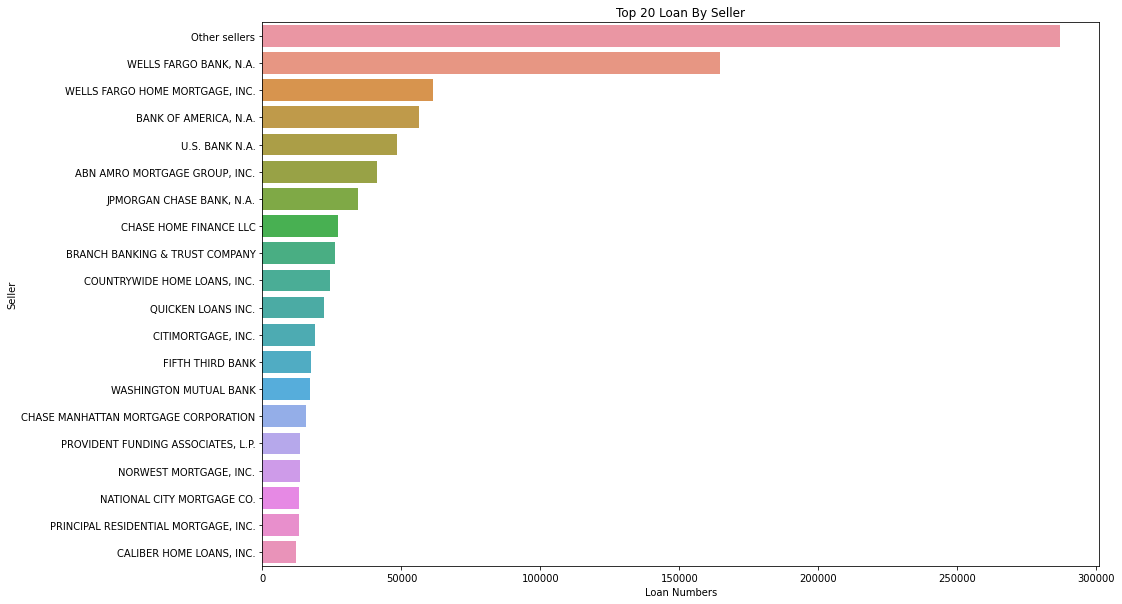

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x='id_loan', y='seller_name',data= seller_loan_total.head(20)).set(title='Top 20 Loan By Seller', xlabel='Loan Numbers', ylabel='Seller')

<AxesSubplot:xlabel='int_rt', ylabel='seller_name'>

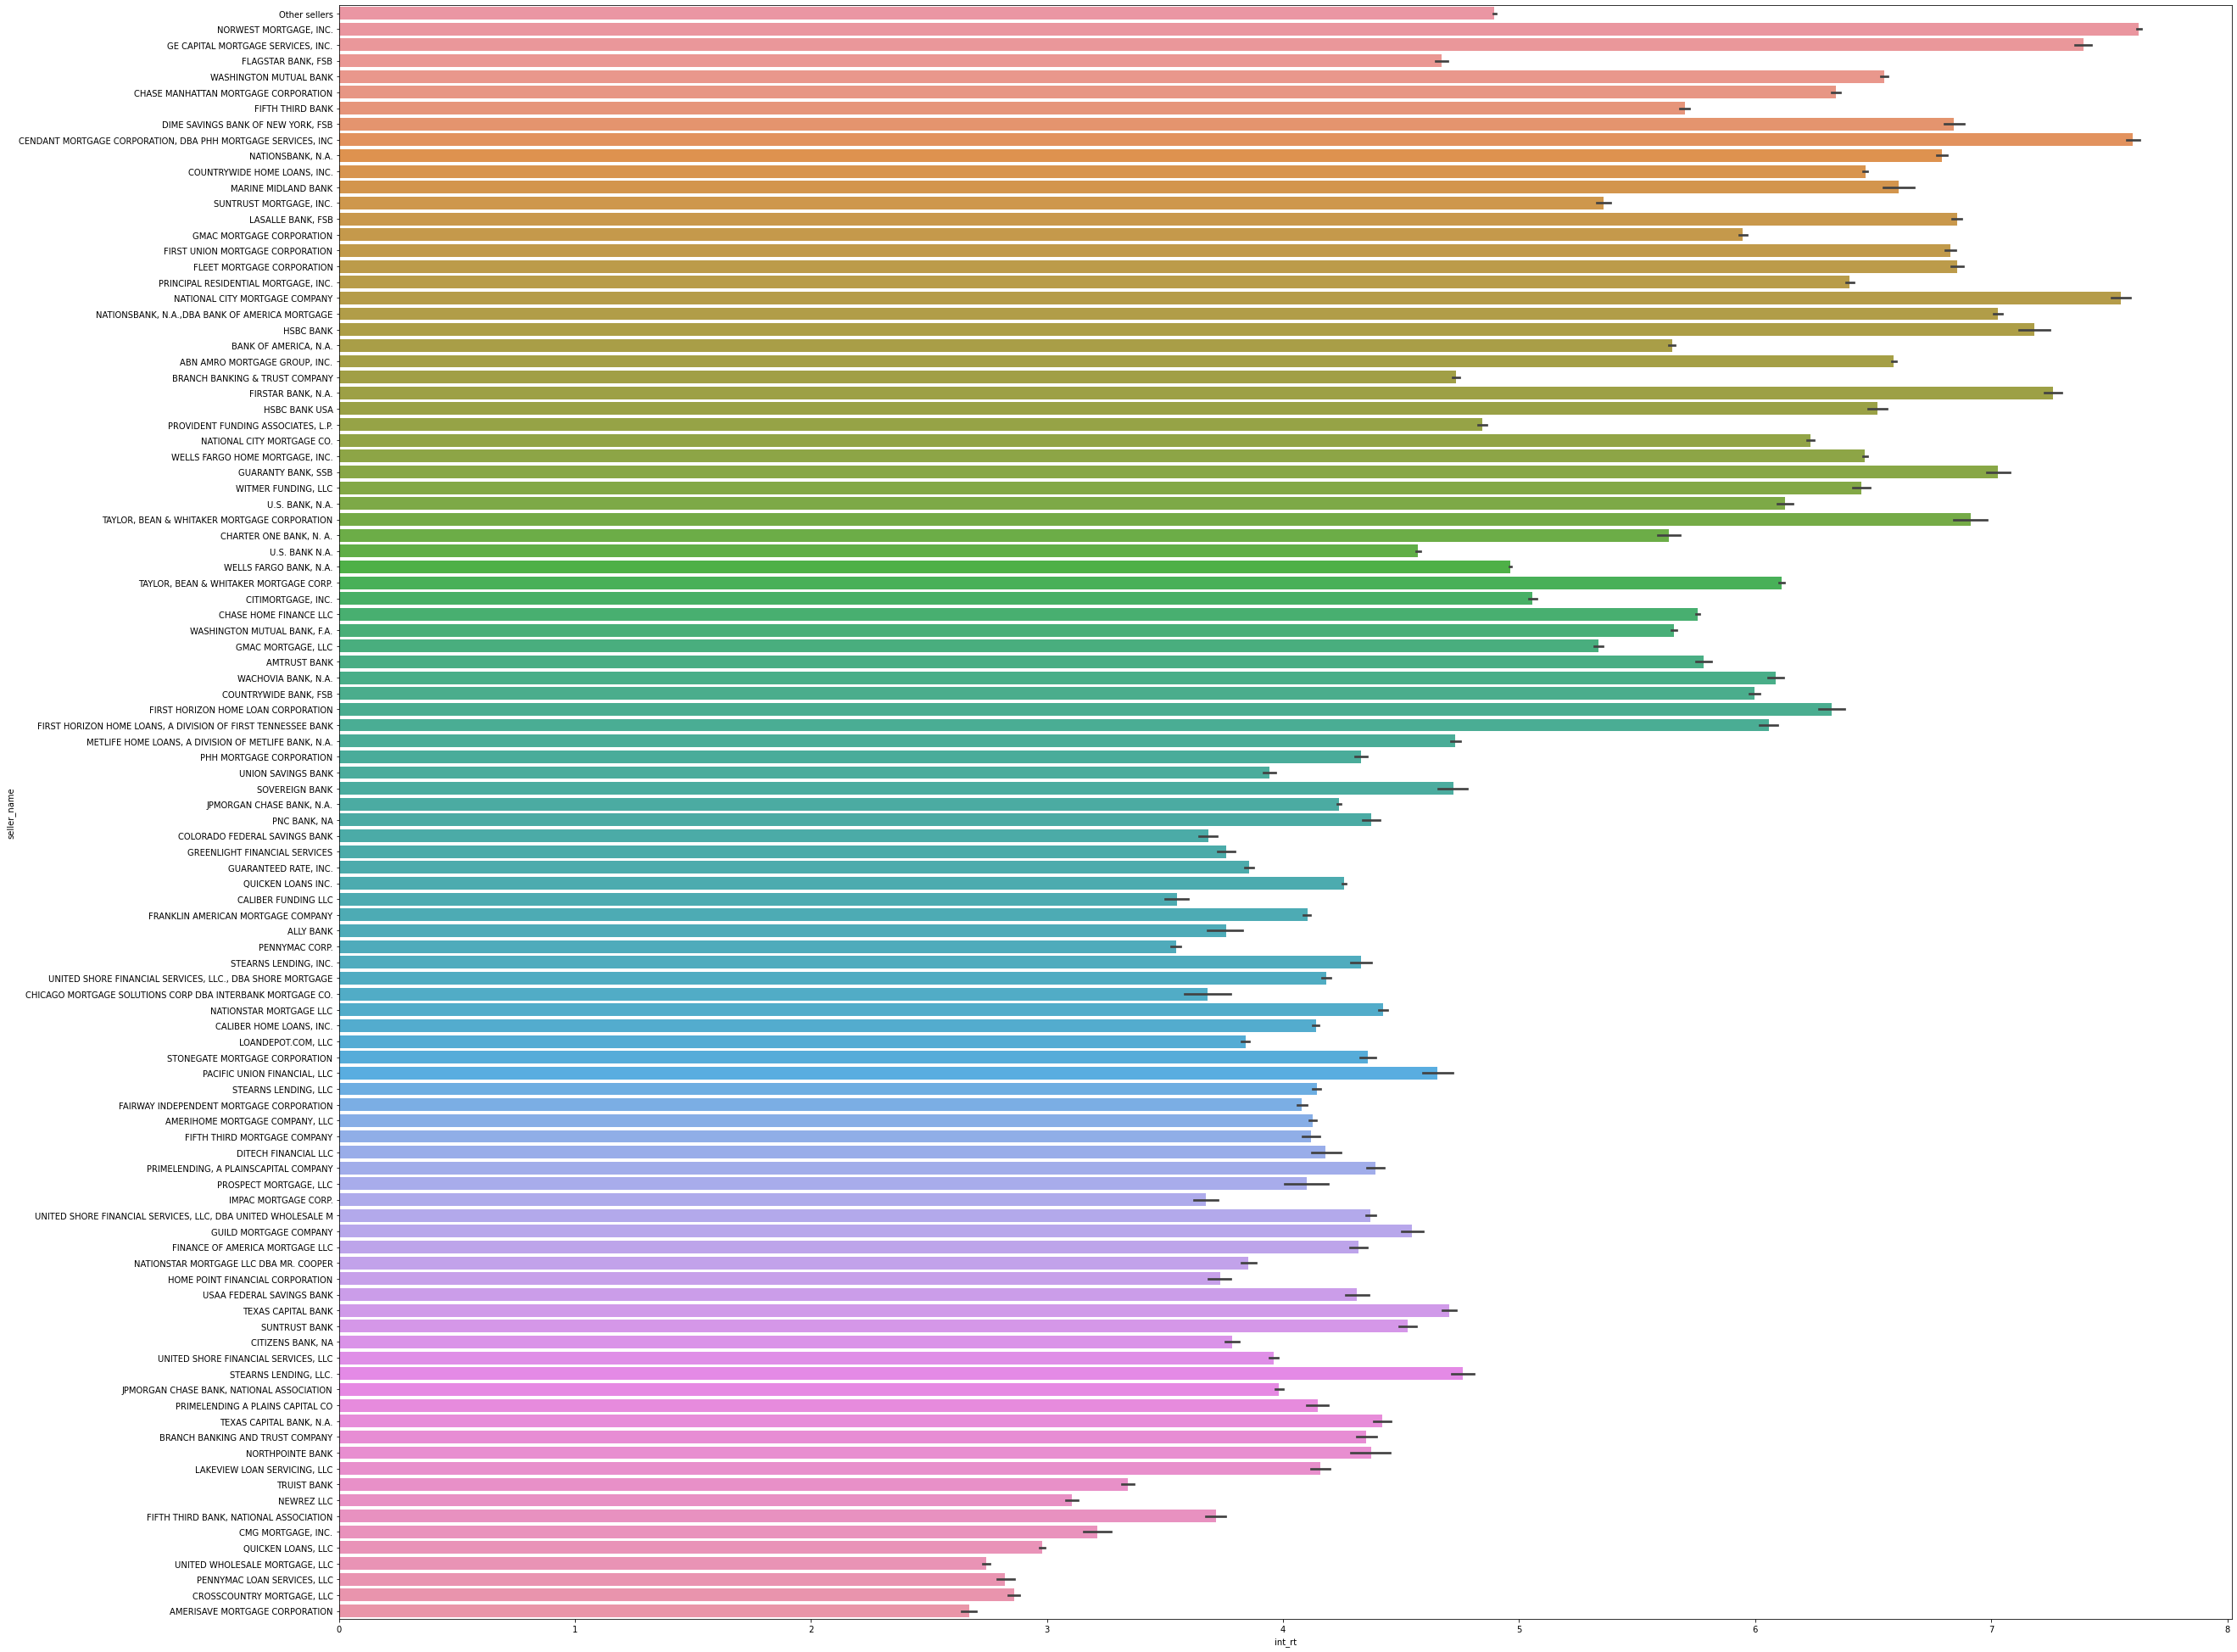

In [33]:
plt.figure(figsize=(40,35))
sns.barplot(x='int_rt', y='seller_name',data= joined_df)

<AxesSubplot:xlabel='dti', ylabel='seller_name'>

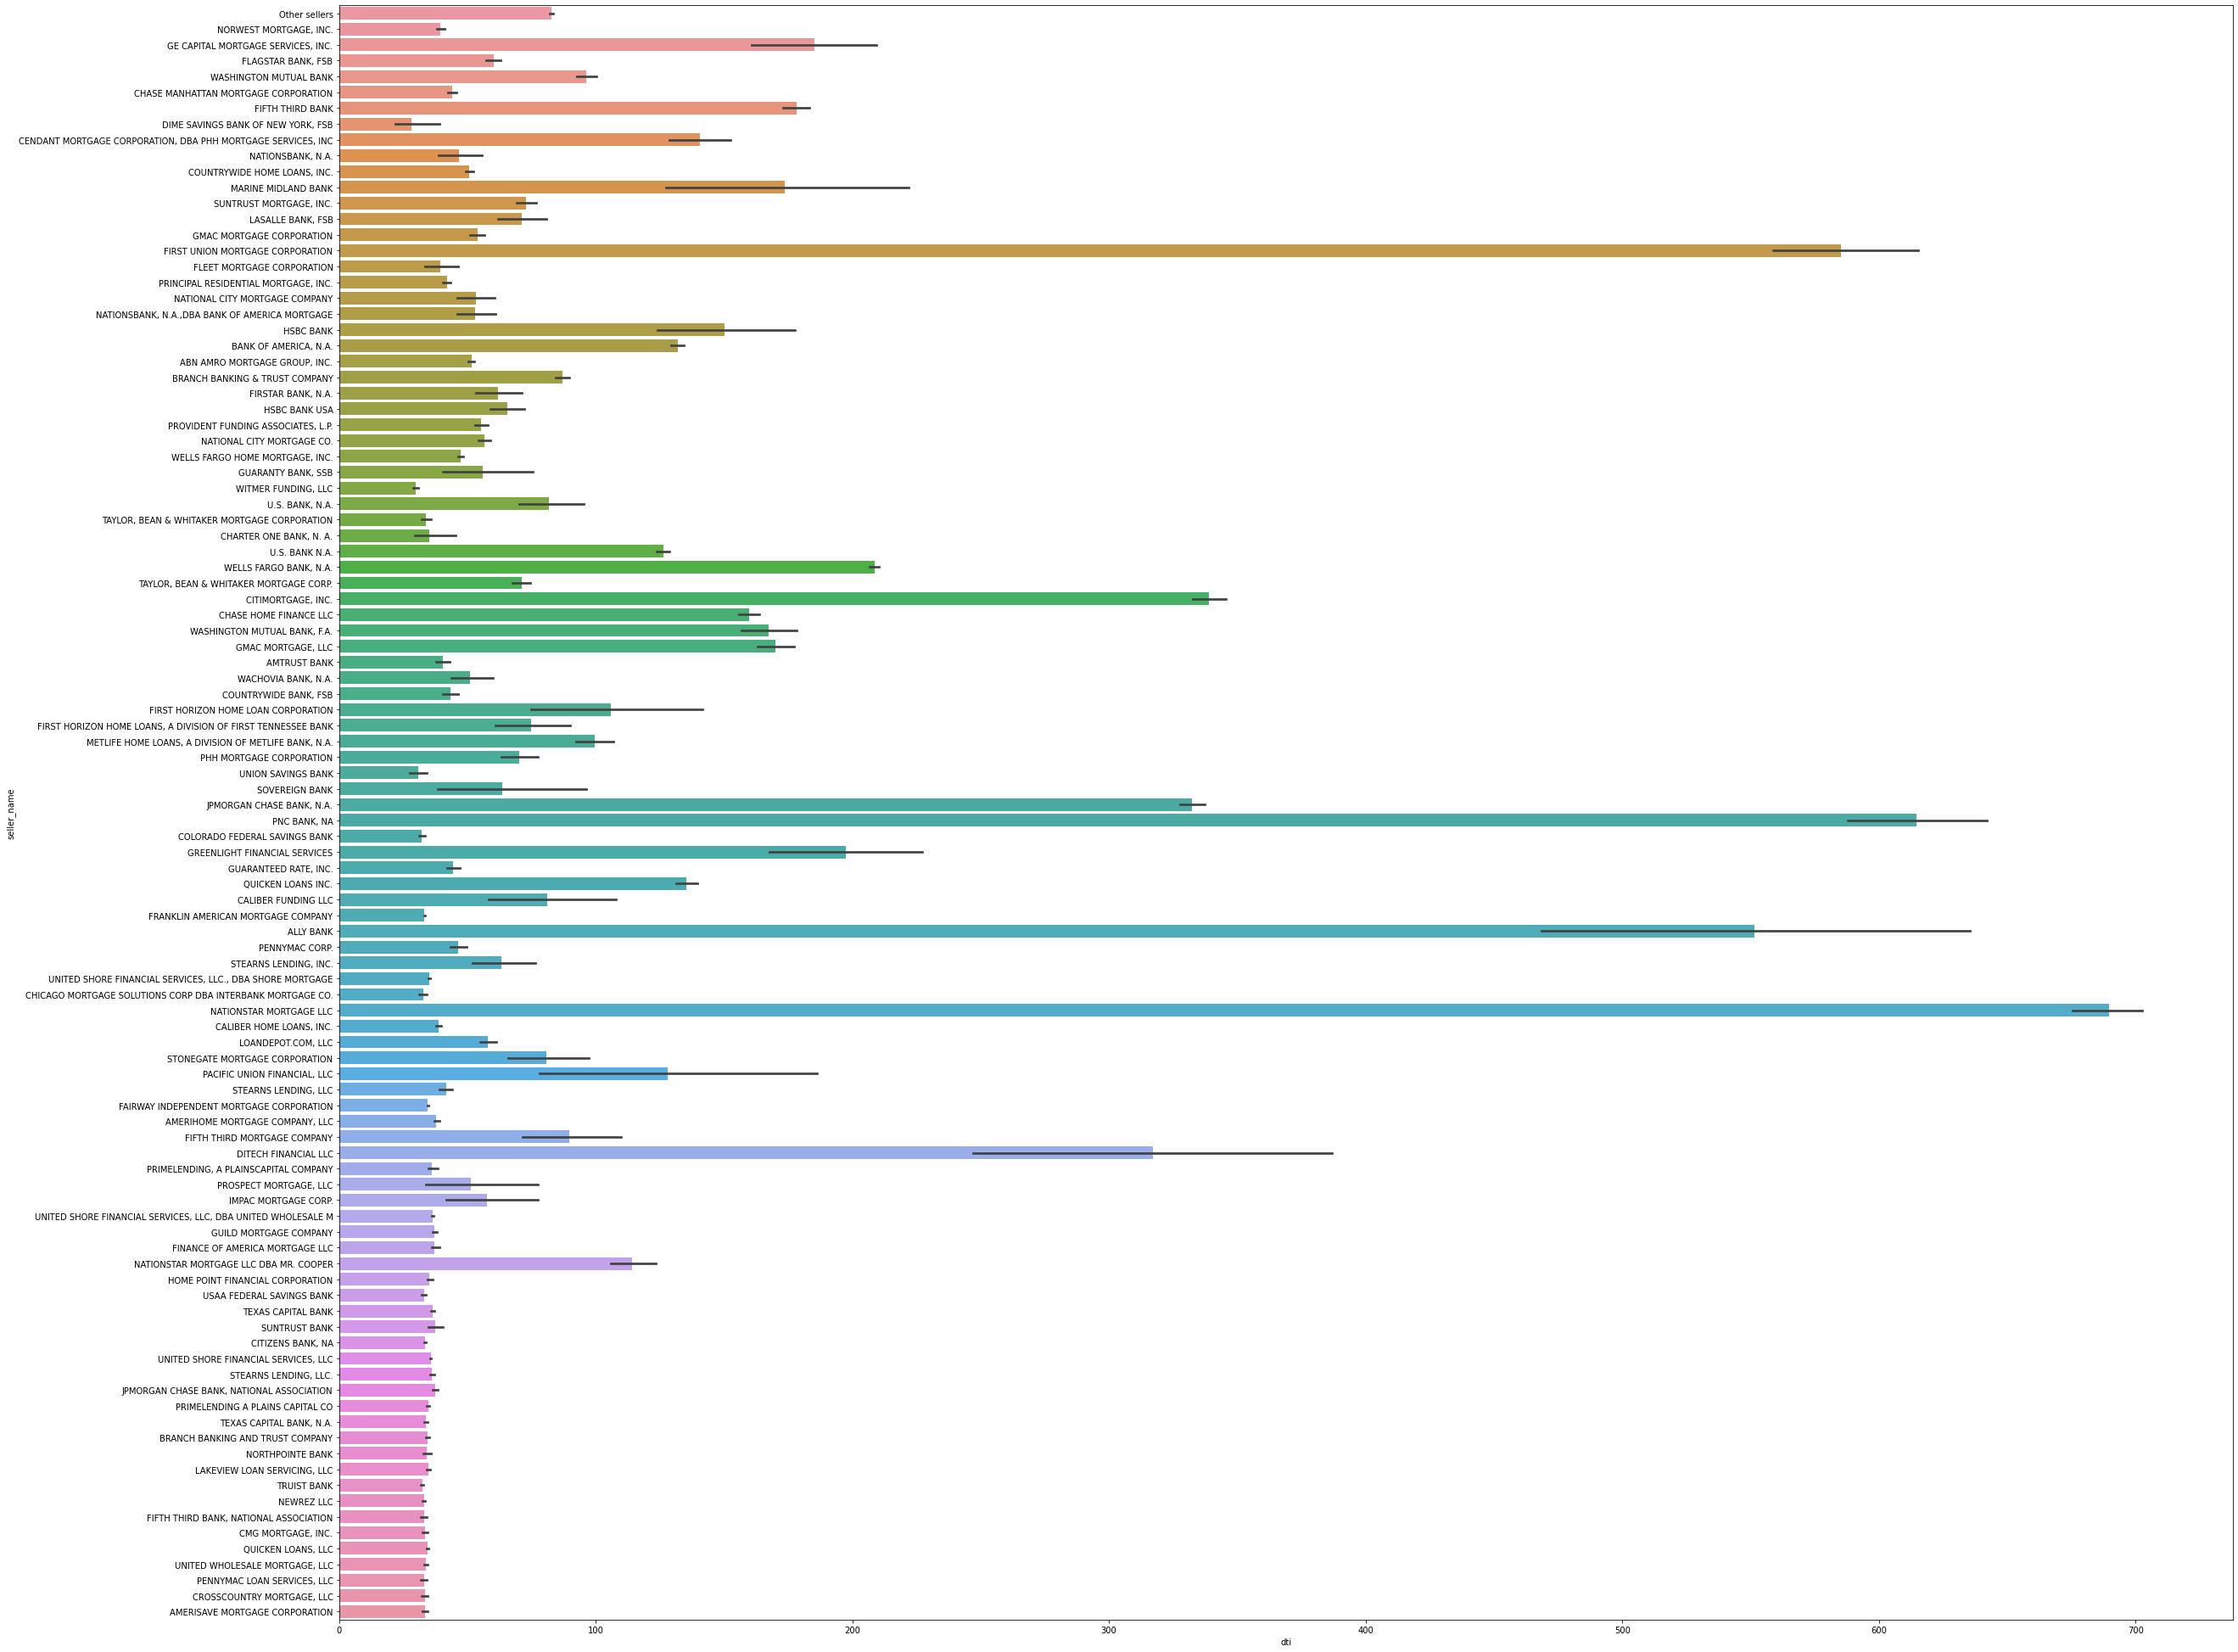

In [34]:
plt.figure(figsize=(40,35))
sns.barplot(x='dti', y='seller_name',data= joined_df)

## Servicer Name Analysis


<AxesSubplot:xlabel='dti', ylabel='servicer_name'>

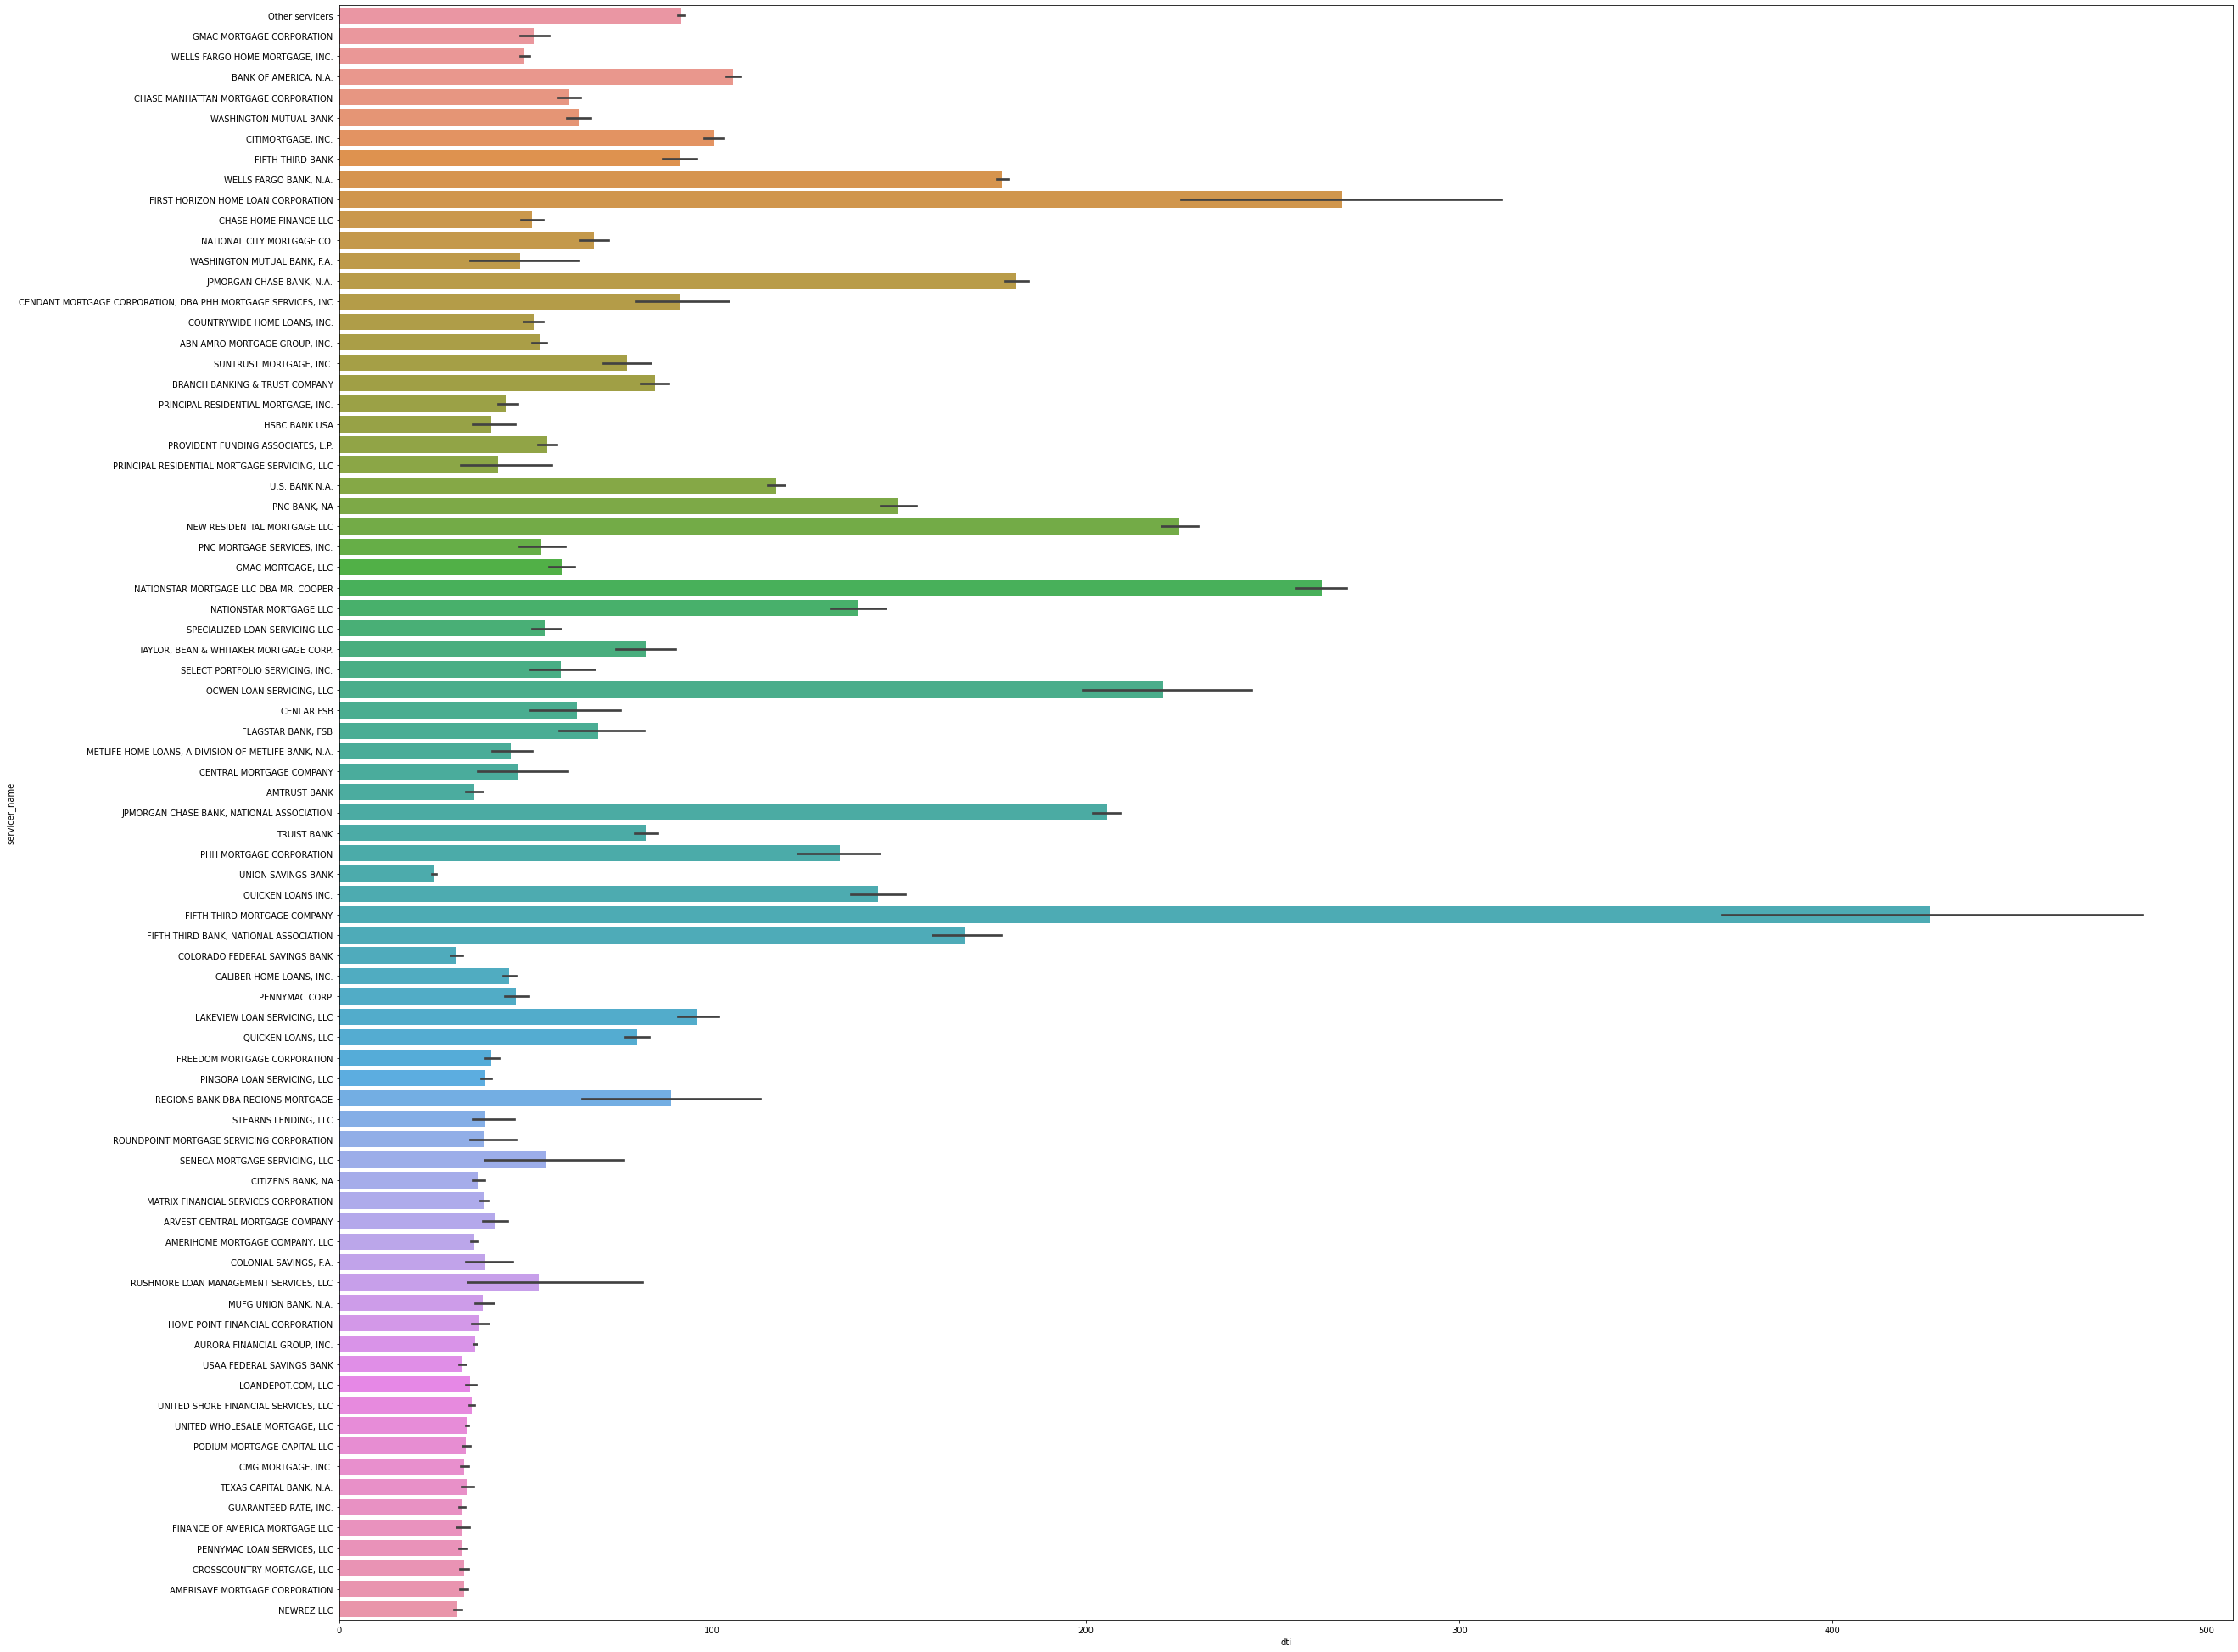

In [32]:
plt.figure(figsize=(40,35))
sns.barplot(x='dti', y='servicer_name',data= joined_df)

## Occupied Type Analysis


<AxesSubplot:xlabel='occpy_sts', ylabel='orig_upb'>

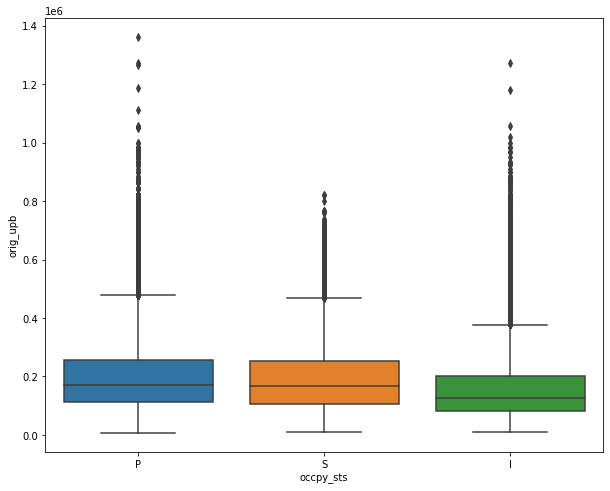

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(x='occpy_sts',y= 'orig_upb', data=joined_df)

## Channel & FICO Analysis


<AxesSubplot:xlabel='channel', ylabel='fico'>

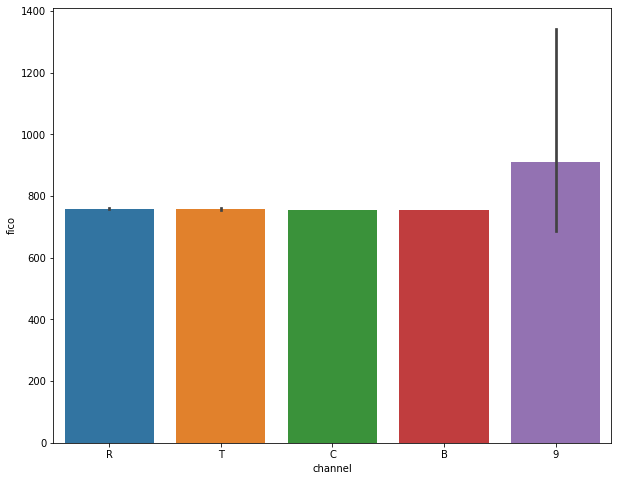

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x='channel', y='fico',data= joined_df)

## Delequency Analysis

<AxesSubplot:xlabel='int_rt', ylabel='max_delq_sts'>

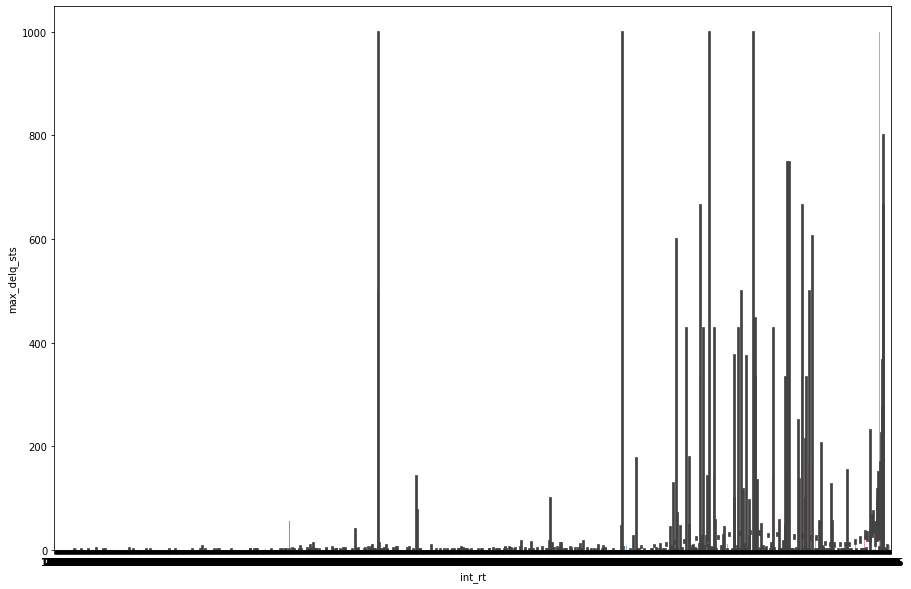

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(x='int_rt', y='max_delq_sts',data= joined_df)

In [38]:
joined_df[joined_df['max_delq_sts'] != 'R'].groupby(['Year'])[['max_delq_sts','max_taxes_ins_costs']].max().iplot(
    yTitle='Deliquency vs Taxes',
    xTitle='Year',
    title='Deliquency vs Taxes By Year',
    mode='lines+markers')

## Actual Loss Analysis

In [57]:
joined_df.groupby('Year')['min_actual_loss'].mean().iplot(
    yTitle='Minimum Actual Loss',
    xTitle='Year',
    title='Minimum Actual Loss By Year',
    colors='Blue',
    mode='lines+markers')

In [61]:
joined_df.groupby('Year')['max_actual_loss'].mean().iplot(
    yTitle='Maximum Actual Loss',
    xTitle='Year',
    title='Maximum Actual Loss By Year',
    colors='Blue',
    mode='lines+markers')

In [64]:
joined_df.groupby('int_rt')['max_actual_loss'].mean().iplot(
    yTitle='Maximum Actual Loss',
    xTitle='Interest Rate',
    title='Maximum Actual Loss By Interest Rate',
    colors='Blue',
    mode='lines+markers')

## Property Type Analysis

<AxesSubplot:xlabel='prop_type', ylabel='int_rt'>

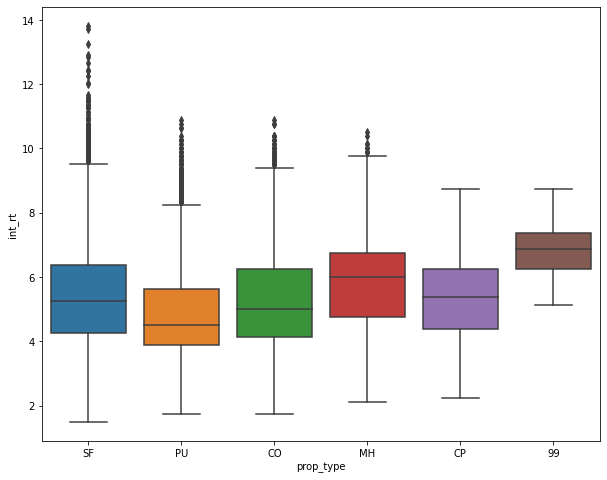

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(x='prop_type',y='int_rt', data=joined_df)

In [40]:
joined_df.groupby('prop_type')['id_loan'].count().iplot(
    yTitle='Loan Count',
    xTitle='Property Type',
    title='Property Type vs Loan Count',
    colors='Blue',
    mode='lines+markers')

In [41]:
joined_df[joined_df['prop_type'] == "CO"].groupby('Year')['orig_upb'].count().iplot(
    yTitle='Condo',
    xTitle='Year',
    title='Total Condo Loan By Year',
    colors='Blue',
    mode='lines+markers')

In [42]:
joined_df[joined_df['prop_type'] == "SF"].groupby(joined_df['Year'])['orig_upb'].count().iplot(
    yTitle='Single-Family',
    xTitle='Year',
    title='Total Single-Family Loan By Year',
    colors='Blue',
    mode='lines+markers')

In [43]:
joined_df[joined_df['prop_type'] == "PU"].groupby('Year')['orig_upb'].count().iplot(
    yTitle='Planned Unit Development',
    xTitle='Year',
    title='Total Planned Unit Development Loan By Year',
    colors='Blue',
    mode='lines+markers')

In [44]:
joined_df[joined_df['prop_type'] == "MH"].groupby('Year')['orig_upb'].count().iplot(
    yTitle='Manufactured Housing',
    xTitle='Year',
    title='Total Manufactured Housing Loan By Year',
    colors='Blue',
    mode='lines+markers')

In [45]:
joined_df[joined_df['prop_type'] == "CP"].groupby('Year')['orig_upb'].count().iplot(
    yTitle='Co-op',
    xTitle='Year',
    title='Total Co-op Loan By Year',
    colors='Blue',
    mode='lines+markers')

## Channel & int Analysis

<AxesSubplot:xlabel='channel', ylabel='int_rt'>

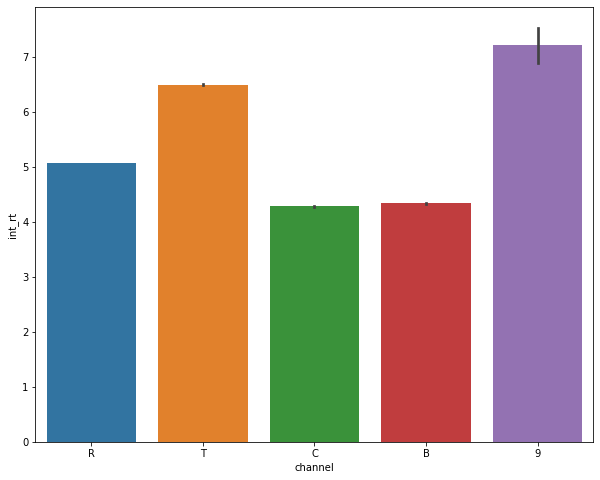

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(x='channel', y='int_rt',data= joined_df)

## UPB & int & minUPB Analysis

In [47]:
ubp = joined_df.groupby(['int_rt'])[['orig_upb','min_current_upb']].mean()
ubp.iplot(
    yTitle='Original UPB vs Minimum Current UPB',
    xTitle='Interest Rate',
    title='Interest Rate vs Original UPB VS Minimum Current UPB',
    mode='lines')

## Loan purpose & int Analysis

<AxesSubplot:xlabel='loan_purpose', ylabel='int_rt'>

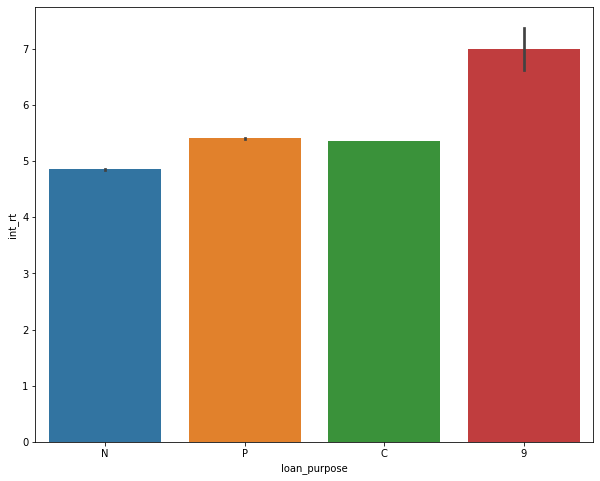

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(x='loan_purpose', y='int_rt',data= joined_df)

In [49]:
joined_df[joined_df['loan_purpose'] != 9].groupby('loan_purpose')['int_rt'].mean().iplot(
    yTitle='Interest Rate',
    xTitle='Loan Purpose',
    title='Loan Purpose vs Mean Interest',
    colors='Blue',
    mode='lines+markers')

## PCT & int Analysis

<AxesSubplot:xlabel='mi_pct', ylabel='int_rt'>

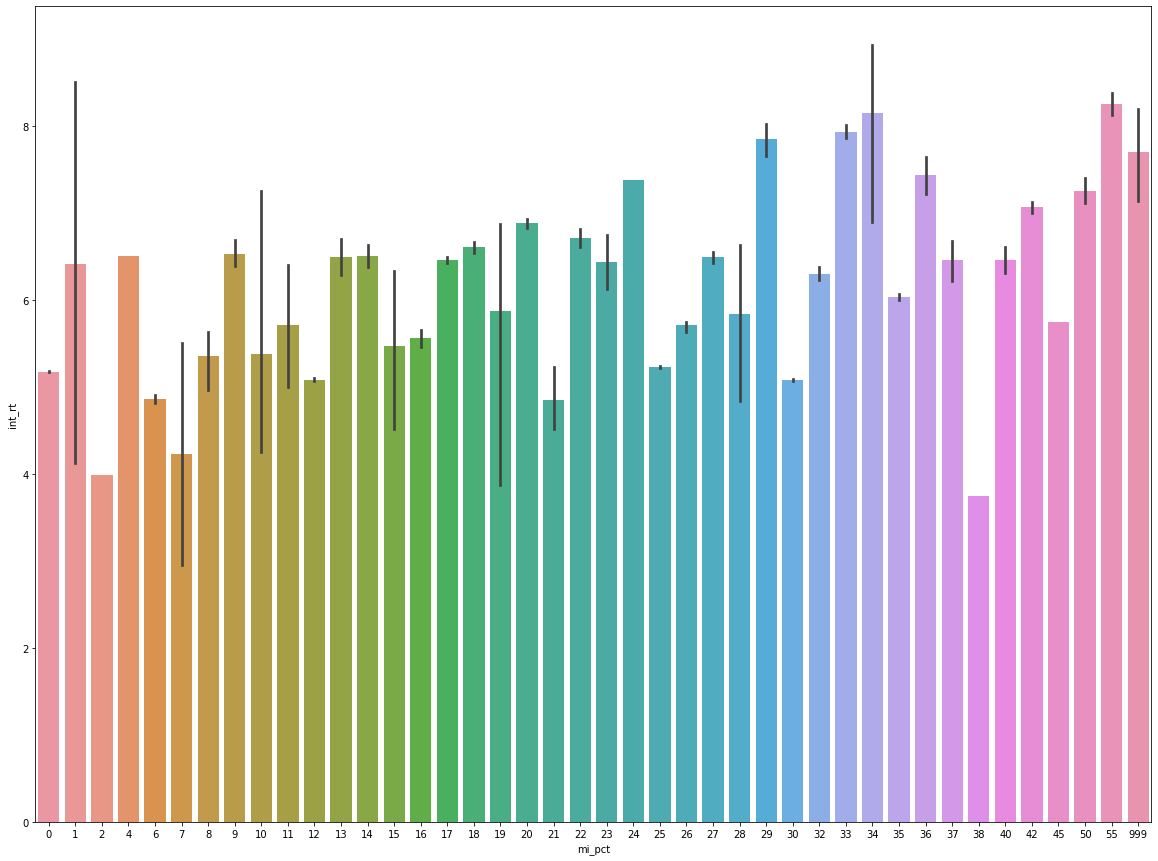

In [50]:
plt.figure(figsize=(20,15))
sns.barplot(x='mi_pct', y='int_rt',data= joined_df)

In [51]:
joined_df[(joined_df['mi_pct'] !=999) & (joined_df['mi_pct'] != 0)].groupby('int_rt').mean()['mi_pct'].iplot(
    yTitle='MI Percentage',
    xTitle='Interest Rate ',
    title='Interest Rate vs Mortgage Interest Percentage Mean',
    colors='Blue',
    mode='markers')

## Create a Dataframe of 2020

In [52]:
df_2020 = joined_df[(joined_df['Year'] == 2020)]
df_2020['Year'].unique()
df_2020.count()

fico                     50000
dt_first_pi              50000
flag_fthb                50000
dt_matr                  50000
cd_msa                   50000
mi_pct                   50000
cnt_units                50000
occpy_sts                50000
cltv                     50000
dti                      50000
orig_upb                 50000
ltv                      50000
int_rt                   50000
channel                  50000
ppmt_pnlty               50000
prod_type                50000
st                       50000
prop_type                50000
zipcode                  50000
id_loan                  50000
loan_purpose             50000
orig_loan_term           50000
cnt_borr                 50000
seller_name              50000
servicer_name            50000
flag_sc                  50000
id_preharp                   0
indicator                50000
harp_indicator           50000
property_method          50000
interest_only            50000
Year                     50000
min_curr

In [53]:
df_2020.describe()

fico    dt_first_pi        dt_matr        cd_msa        mi_pct  \
count  50000.00000   50000.000000   50000.000000  50000.000000  50000.000000   
mean     760.38634  202022.932980  204664.003820  27882.898800      5.228360   
std      137.14650      34.769881     610.239145  13723.897854     10.417421   
min      600.00000  202002.000000  202802.000000      0.000000      0.000000   
25%      732.00000  202006.000000  204506.000000  16984.000000      0.000000   
50%      768.00000  202009.000000  205005.000000  31084.000000      0.000000   
75%      792.00000  202012.000000  205009.000000  39340.000000      0.000000   
max     9999.00000  202108.000000  205107.000000  49740.000000     35.000000   

          cnt_units          cltv           dti      orig_upb           ltv  \
count  50000.000000  50000.000000  50000.000000  5.000000e+04  50000.000000   
mean       1.021480     70.906040     33.336360  2.866746e+05     70.674100   
std        0.189577     16.799386     10.655088  1.402731e+05     16.828523   
min        1.000000      7.000000      1.000000  1.800000e+04      7.000000   
25%        1.000000     60.000000     26.000000  1.800000e+05     60.000000   
50%        1.000000     74.000000     34.000000  2.630000e+05     74.000000   
75%        1.000000     80.000000     41.000000  3.710000e+05     80.000000   
max        4.000000    105.000000    999.000000  1.360000e+06     97.000000   

       ...  min_maint_pres_costs  max_maint_pres_costs  min_taxes_ins_costs  \
count  ...               50000.0               50000.0              50000.0   
mean   ...                   0.0                   0.0                  0.0   
std    ...                   0.0                   0.0                  0.0   
min    ...                   0.0                   0.0                  0.0   
25%    ...                   0.0                   0.0                  0.0   
50%    ...                   0.0                   0.0                  0.0   
75%    ...                   0.0                   0.0                  0.0   
max    ...                   0.0                   0.0                  0.0   

       max_taxes_ins_costs  min_misc_costs  max_misc_costs  min_actual_loss  \
count              50000.0         50000.0         50000.0          50000.0   
mean                   0.0             0.0             0.0              0.0   
std                    0.0             0.0             0.0              0.0   
min                    0.0             0.0             0.0              0.0   
25%                    0.0             0.0             0.0              0.0   
50%                    0.0             0.0             0.0              0.0   
75%                    0.0             0.0             0.0              0.0   
max                    0.0             0.0             0.0              0.0   

       max_actual_loss  min_modcost   max_modcost  
count          50000.0      50000.0  50000.000000  
mean               0.0          0.0      0.788660  
std                0.0          0.0     13.482096  
min                0.0          0.0      0.000000  
25%                0.0          0.0      0.000000  
50%                0.0          0.0      0.000000  
75%                0.0          0.0      0.000000  
max                0.0          0.0    712.400000  

[8 rows x 38 columns]

In [54]:
df_2020.corr()

fico  dt_first_pi   dt_matr    cd_msa    mi_pct  \
fico                   1.000000     0.001994 -0.022358 -0.005415 -0.029051   
dt_first_pi            0.001994     1.000000  0.033907  0.017735 -0.038403   
dt_matr               -0.022358     0.033907  1.000000  0.055908  0.240591   
cd_msa                -0.005415     0.017735  0.055908  1.000000 -0.031732   
mi_pct                -0.029051    -0.038403  0.240591 -0.031732  1.000000   
cnt_units             -0.000844     0.010996  0.021068  0.002182 -0.046538   
cltv                  -0.041097    -0.053899  0.305745 -0.052416  0.637041   
dti                   -0.058998    -0.013140  0.096429  0.021712  0.079246   
orig_upb               0.026090     0.029306  0.206074  0.163334  0.018592   
ltv                   -0.042091    -0.053914  0.305699 -0.052135  0.641452   
int_rt                -0.077586    -0.345547  0.340589 -0.006367  0.091269   
zipcode                0.003751    -0.006149  0.069887  0.098508 -0.070773   
orig_loan_term        -0.022527     0.002387  0.999072  0.055212  0.242210   
cnt_borr              -0.021317     0.003755 -0.047905 -0.016281 -0.036302   
property_method       -0.028217    -0.079968  0.123440 -0.081379  0.303385   
Year                        NaN          NaN       NaN       NaN       NaN   
min_current_upb        0.018297     0.158693  0.156695  0.104250  0.037359   
max_current_upb        0.025562     0.029522  0.207440  0.163144  0.018764   
min_delq_sts          -0.003241    -0.001921  0.002514  0.003994 -0.002245   
max_delq_sts          -0.025506    -0.051568  0.028988  0.006269  0.033476   
min_cd_zero_bal        0.001182    -0.007738  0.003499  0.005993  0.000781   
max_cd_zero_bal       -0.006715    -0.033011  0.013018  0.000570  0.007085   
min_non_mi_recoveries       NaN          NaN       NaN       NaN       NaN   
max_non_mi_recoveries       NaN          NaN       NaN       NaN       NaN   
min_expenses                NaN          NaN       NaN       NaN       NaN   
max_expenses                NaN          NaN       NaN       NaN       NaN   
min_legal_costs             NaN          NaN       NaN       NaN       NaN   
max_legal_costs             NaN          NaN       NaN       NaN       NaN   
min_maint_pres_costs        NaN          NaN       NaN       NaN       NaN   
max_maint_pres_costs        NaN          NaN       NaN       NaN       NaN   
min_taxes_ins_costs         NaN          NaN       NaN       NaN       NaN   
max_taxes_ins_costs         NaN          NaN       NaN       NaN       NaN   
min_misc_costs              NaN          NaN       NaN       NaN       NaN   
max_misc_costs              NaN          NaN       NaN       NaN       NaN   
min_actual_loss             NaN          NaN       NaN       NaN       NaN   
max_actual_loss             NaN          NaN       NaN       NaN       NaN   
min_modcost                 NaN          NaN       NaN       NaN       NaN   
max_modcost           -0.014148    -0.031575  0.021539  0.008634  0.028792   

                       cnt_units      cltv       dti  orig_upb       ltv  ...  \
fico                   -0.000844 -0.041097 -0.058998  0.026090 -0.042091  ...   
dt_first_pi             0.010996 -0.053899 -0.013140  0.029306 -0.053914  ...   
dt_matr                 0.021068  0.305745  0.096429  0.206074  0.305699  ...   
cd_msa                  0.002182 -0.052416  0.021712  0.163334 -0.052135  ...   
mi_pct                 -0.046538  0.637041  0.079246  0.018592  0.641452  ...   
cnt_units               1.000000 -0.053921  0.067188  0.062048 -0.052805  ...   
cltv                   -0.053921  1.000000  0.110322  0.093234  0.993137  ...   
dti                     0.067188  0.110322  1.000000  0.045857  0.109117  ...   
orig_upb                0.062048  0.093234  0.045857  1.000000  0.085750  ...   
ltv                    -0.052805  0.993137  0.109117  0.085750  1.000000  ...   
int_rt                  0.102528  0.191790  0.142437 -0.122536  0.192319  ...   
zipcode     

<AxesSubplot:>

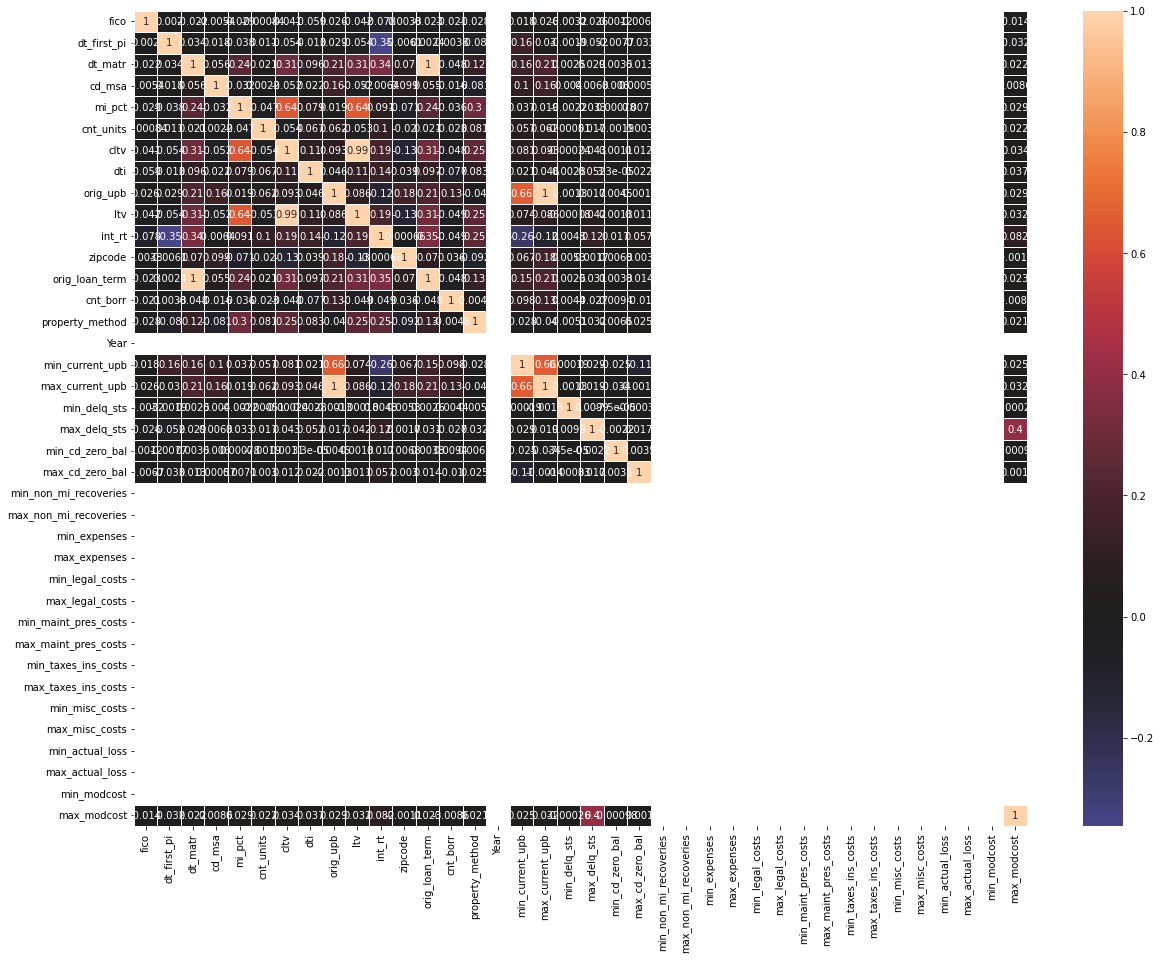

In [55]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_2020.corr(), annot=True, linewidths=0.5, center=0)

In [56]:
df_numerical= df_2020.groupby('int_rt').mean()
df_numerical.iplot()
